In [1]:
# Load libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
#Metrics Class.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Metrics Regr.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Data Sets
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
california_housing.frame.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  
8    -122.26        2.267  
9    -122.25        2.611

In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


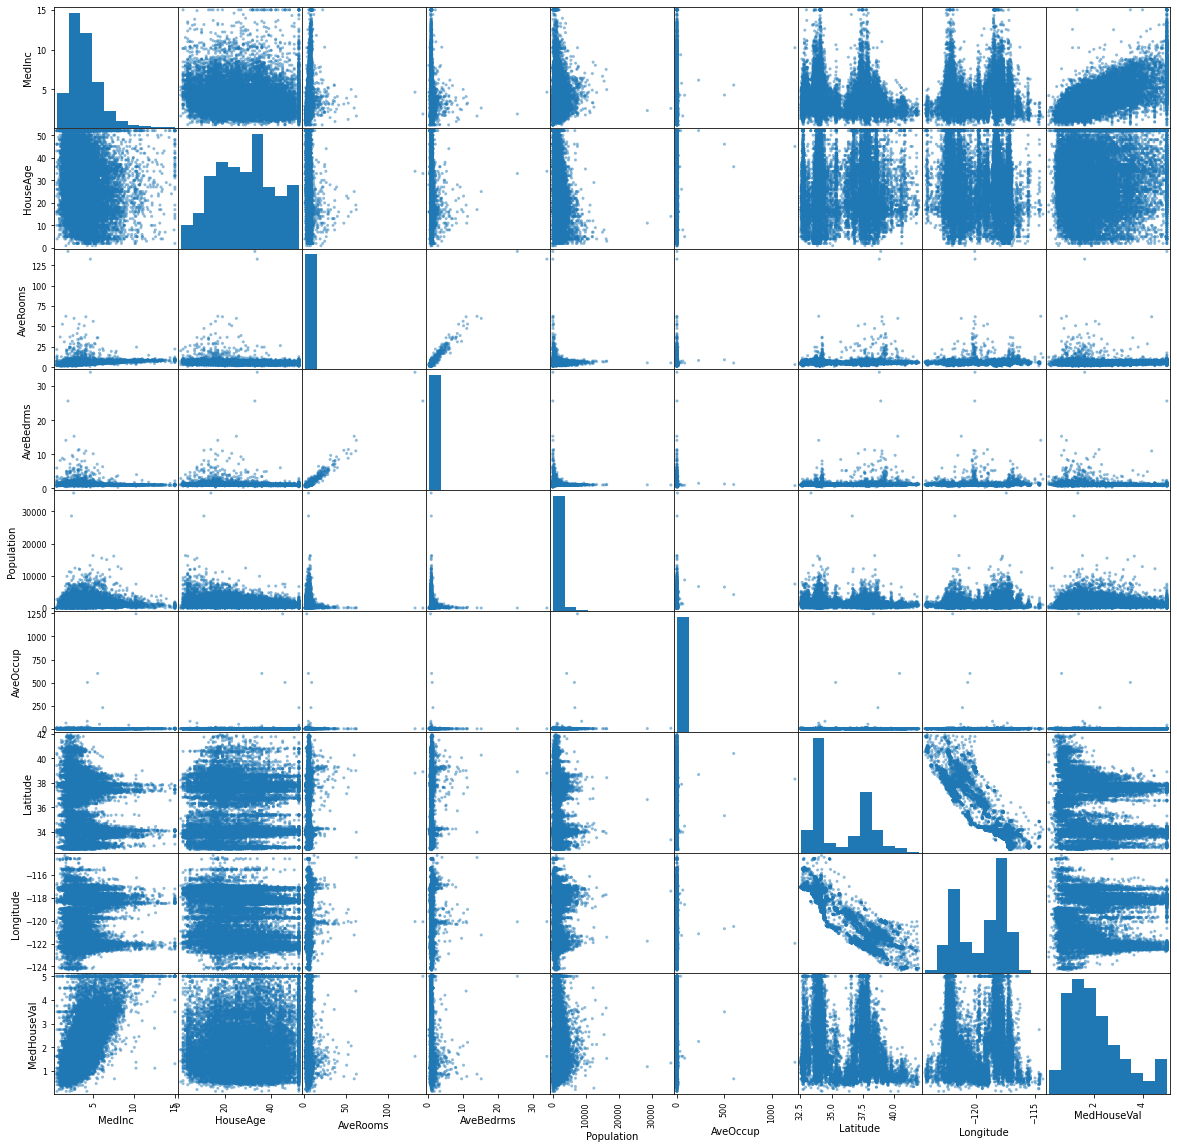

In [6]:
scatter_matrix(california_housing.frame)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [7]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

AveRooms     AveBedrms      AveOccup    Population
count  20640.000000  20640.000000  20640.000000  20640.000000
mean       5.429000      1.096675      3.070655   1425.476744
std        2.474173      0.473911     10.386050   1132.462122
min        0.846154      0.333333      0.692308      3.000000
25%        4.440716      1.006079      2.429741    787.000000
50%        5.229129      1.048780      2.818116   1166.000000
75%        6.052381      1.099526      3.282261   1725.000000
max      141.909091     34.066667   1243.333333  35682.000000

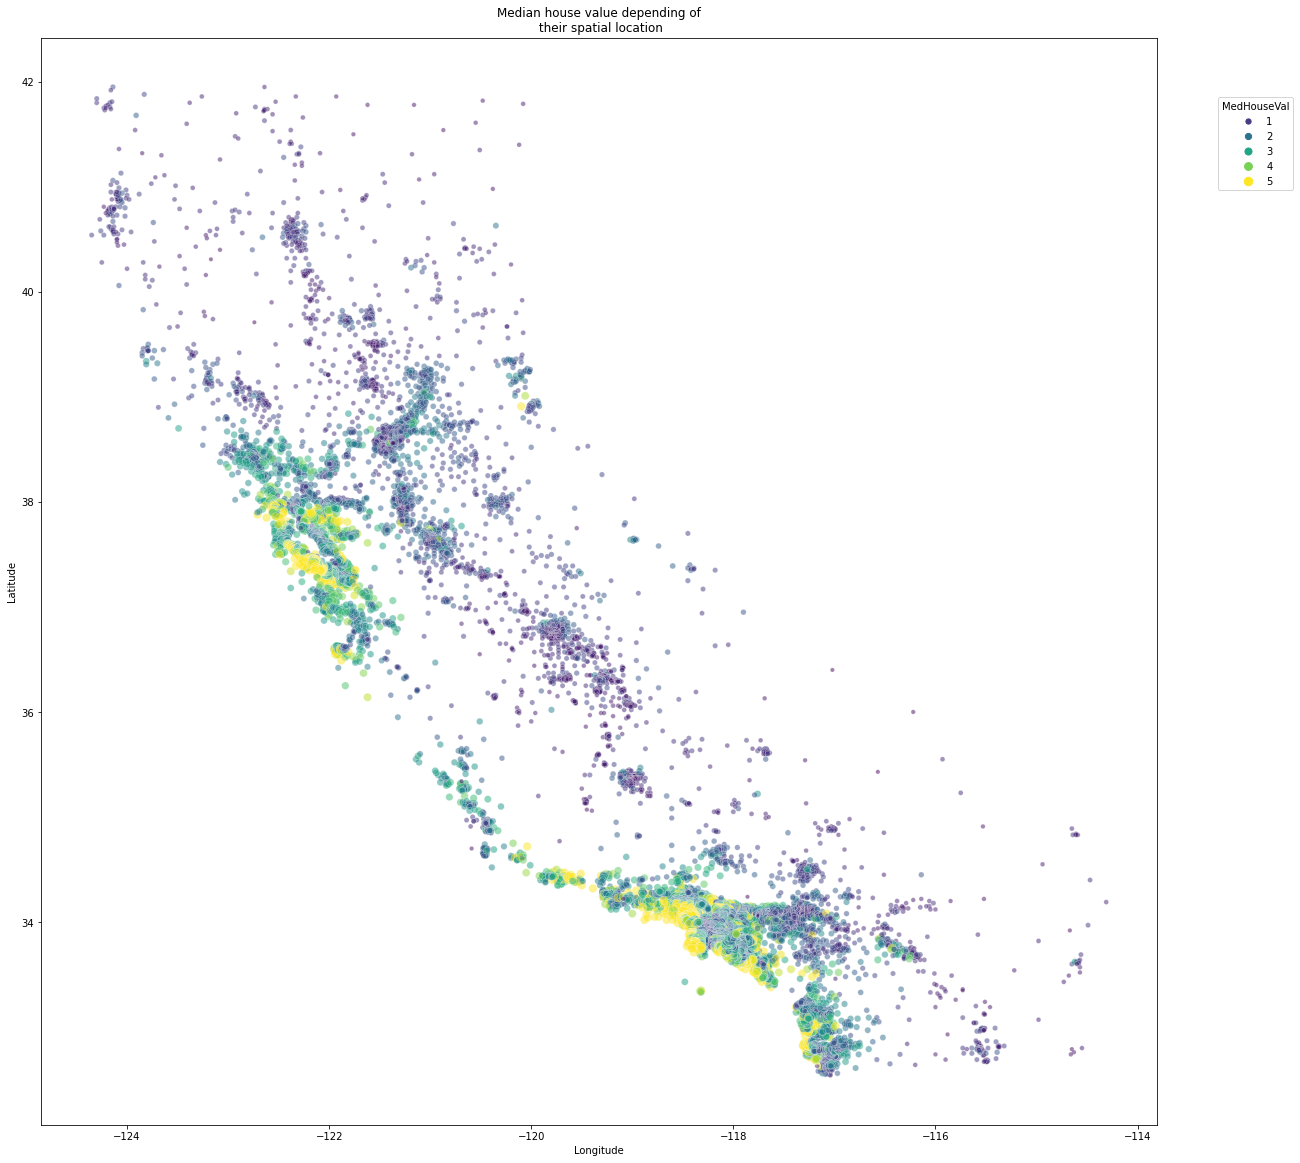

In [8]:
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [9]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

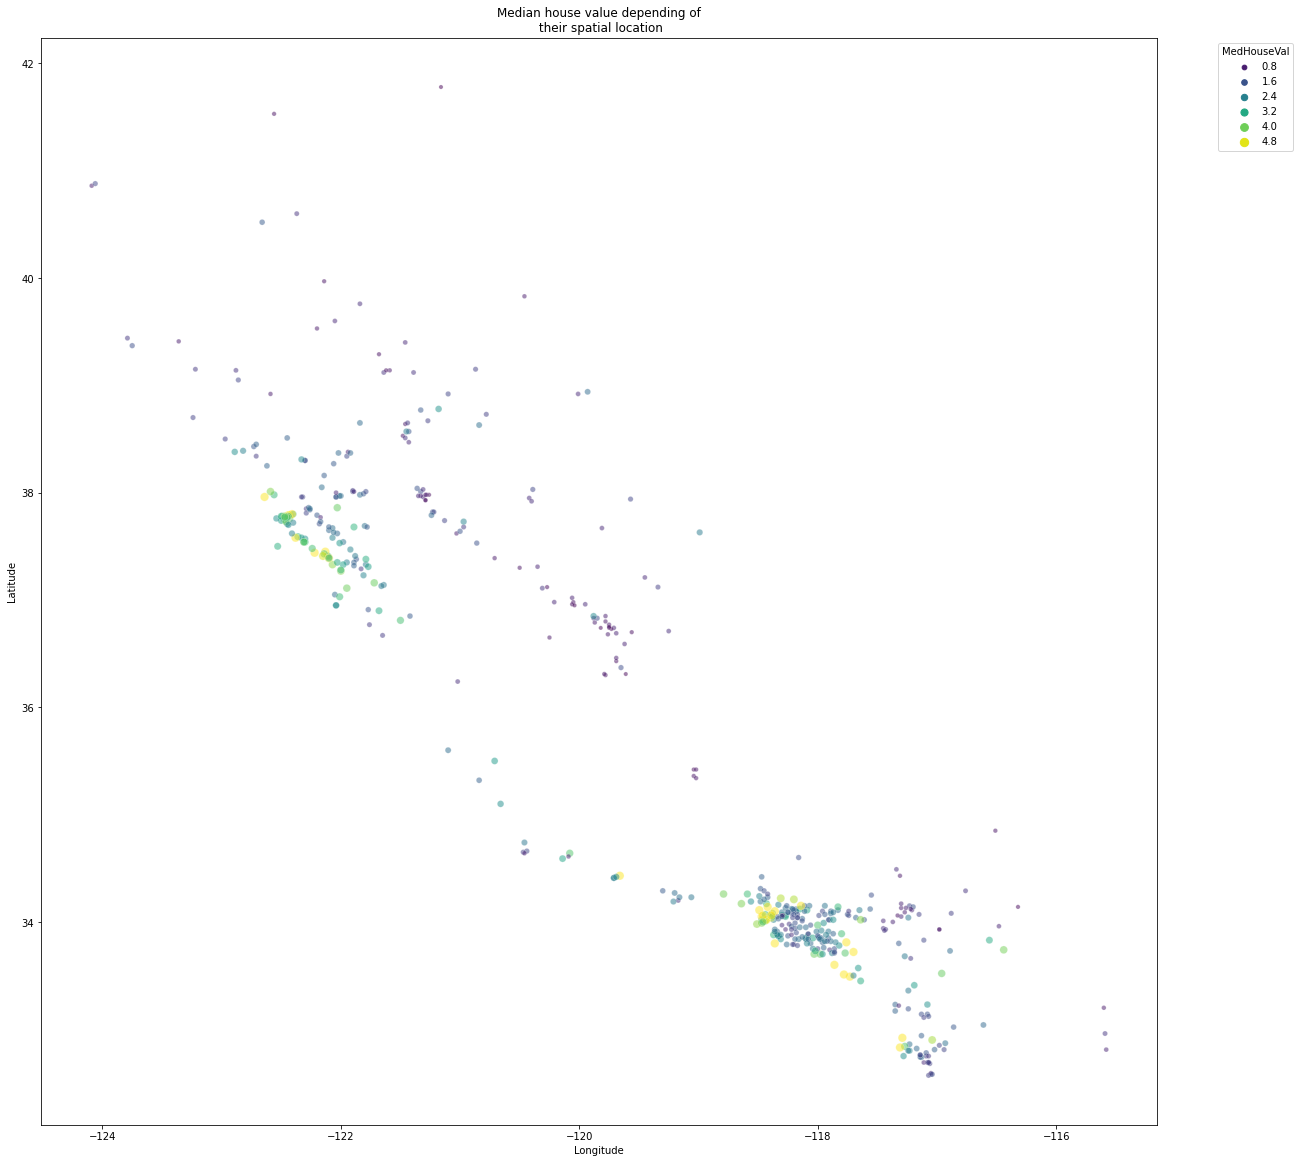

In [10]:
sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [11]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

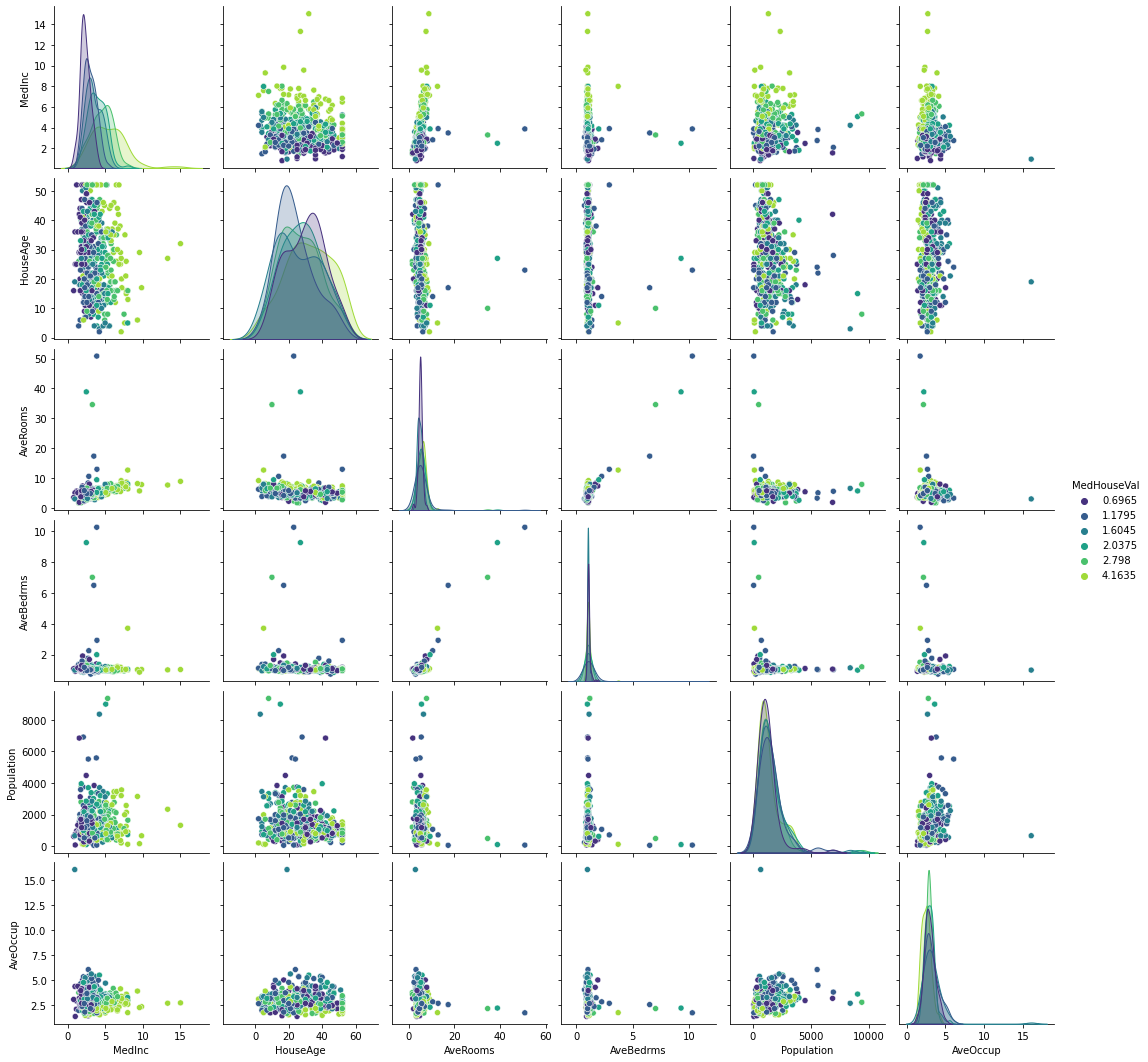

In [12]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

In [29]:
#Array and Data Split
X = california_housing.data.values
y = california_housing.target.values
#Data Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN regression

In [30]:
# KNN Regression
algo = KNeighborsRegressor()
#create 10 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Define our candidate hyperparameters
#n_neighbors = np.arange(2,10,1)
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
#scoring = 'neg_mean_squared_error'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#print(results.mean())

The best parameters are {'n_neighbors': 8, 'weights': 'distance'} with a score of 0.16


In [56]:
#grid.cv_results_

In [32]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["res"])],axis=1)
grid_results.head()

n_neighbors   weights       res
0            2   uniform  0.007976
1            2  distance  0.018407
2            3   uniform  0.077904
3            3  distance  0.093910
4            4   uniform  0.107685

In [33]:
grid_contour = grid_results.groupby(['n_neighbors','weights']).mean()
grid_contour

res
n_neighbors weights           
2           distance  0.018407
            uniform   0.007976
3           distance  0.093910
            uniform   0.077904
4           distance  0.125841
            uniform   0.107685
5           distance  0.147652
            uniform   0.127808
6           distance  0.154567
            uniform   0.131984
7           distance  0.159440
            uniform   0.135478
8           distance  0.163048
            uniform   0.137881
9           distance  0.162397
            uniform   0.135804

In [34]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['n_neighbors', 'weights', 'res']
grid_pivot = grid_reset.pivot('n_neighbors', 'weights')
grid_pivot

res          
weights      distance   uniform
n_neighbors                    
2            0.018407  0.007976
3            0.093910  0.077904
4            0.125841  0.107685
5            0.147652  0.127808
6            0.154567  0.131984
7            0.159440  0.135478
8            0.163048  0.137881
9            0.162397  0.135804

In [35]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='weights')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='n_neighbors') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [36]:
n_neighbors_best = grid.cv_results_['param_n_neighbors'][grid.best_index_]
weights_best = grid.cv_results_['param_weights'][grid.best_index_]
model = KNeighborsRegressor(n_neighbors=n_neighbors_best, weights=weights_best)
model.fit(X_train,y_train)
res = model.predict(X_test)
#print(res)

In [37]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

1.1175461981778658


In [38]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

1.0571405763557966


In [39]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.8204955222861128


In [40]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

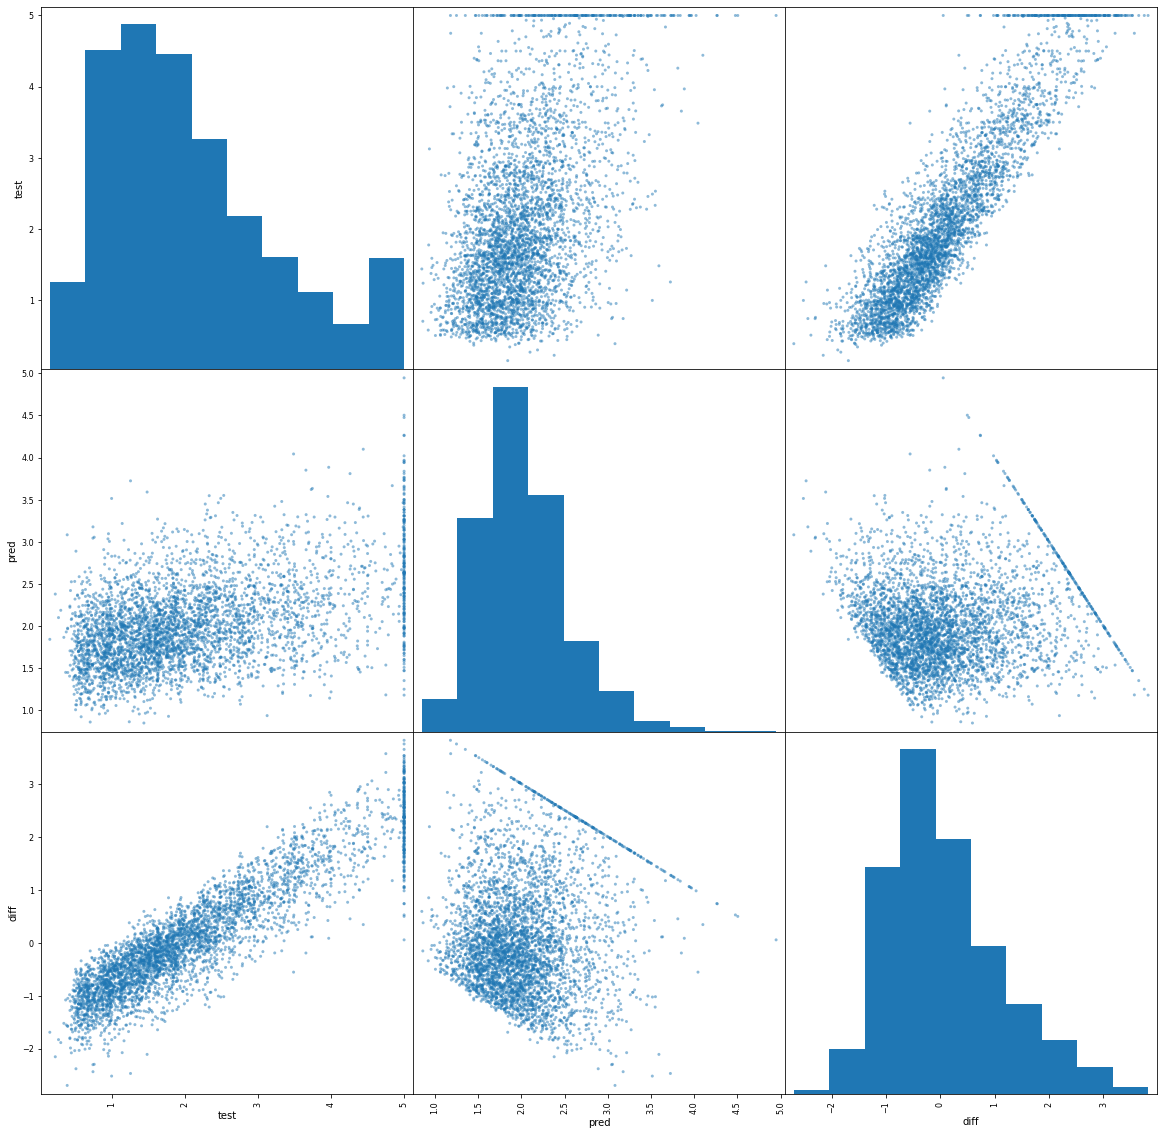

In [41]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

# Random Forrest

In [51]:
# Random Forrest
algo = RandomForestRegressor()
#create folds
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
# Define our candidate hyperparameters
max_features_range = np.arange(1,10,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2)
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 2/3] END ...max_features=1, n_estimators=10;, score=0.745 total time=   0.1s
[CV 1/3] END ...max_features=1, n_estimators=60;, score=0.774 total time=   0.7s
[CV 3/3] END ...max_features=1, n_estimators=60;, score=0.769 total time=   0.7s
[CV 2/3] END ..max_features=1, n_estimators=110;, score=0.778 total time=   1.2s
[CV 1/3] END ..max_features=1, n_estimators=160;, score=0.780 total time=   1.8s
[CV 3/3] END ..max_features=1, n_estimators=160;, score=0.767 total time=   1.8s
[CV 2/3] END ...max_features=3, n_estimators=60;, score=0.812 total time=   1.3s
[CV 1/3] END ..max_features=3, n_estimators=110;, score=0.811 total time=   2.5s
[CV 3/3] END ..max_features=3, n_estimators=110;, score=0.796 total time=   2.5s
[CV 2/3] END ..max_features=3, n_estimators=160;, score=0.817 total time=   3.7s
[CV 1/3] END ...max_features=5, n_estimators=10;, score=0.786 total time=   0.3s
[CV 2/3] END ...max_features=5, n_estimators=1

[CV 1/3] END ...max_features=1, n_estimators=10;, score=0.725 total time=   0.1s
[CV 3/3] END ...max_features=1, n_estimators=10;, score=0.730 total time=   0.1s
[CV 2/3] END ...max_features=1, n_estimators=60;, score=0.780 total time=   0.7s
[CV 1/3] END ..max_features=1, n_estimators=110;, score=0.777 total time=   1.3s
[CV 3/3] END ..max_features=1, n_estimators=110;, score=0.763 total time=   1.2s
[CV 2/3] END ..max_features=1, n_estimators=160;, score=0.784 total time=   1.8s
[CV 1/3] END ...max_features=3, n_estimators=10;, score=0.783 total time=   0.2s
[CV 2/3] END ...max_features=3, n_estimators=10;, score=0.789 total time=   0.2s
[CV 3/3] END ...max_features=3, n_estimators=10;, score=0.772 total time=   0.2s
[CV 1/3] END ...max_features=3, n_estimators=60;, score=0.809 total time=   1.4s
[CV 3/3] END ...max_features=3, n_estimators=60;, score=0.797 total time=   1.4s
[CV 2/3] END ..max_features=3, n_estimators=110;, score=0.817 total time=   2.5s
[CV 1/3] END ..max_features=

[CV 3/3] END ..max_features=3, n_estimators=140;, score=0.798 total time=   3.2s
[CV 2/3] END ..max_features=3, n_estimators=150;, score=0.819 total time=   3.4s
[CV 1/3] END ..max_features=3, n_estimators=160;, score=0.810 total time=   3.8s
[CV 3/3] END ..max_features=3, n_estimators=160;, score=0.796 total time=   3.8s
[CV 2/3] END ..max_features=3, n_estimators=170;, score=0.820 total time=   4.0s
[CV 1/3] END ..max_features=3, n_estimators=180;, score=0.810 total time=   4.1s
[CV 3/3] END ..max_features=3, n_estimators=180;, score=0.798 total time=   4.1s
[CV 2/3] END ..max_features=3, n_estimators=190;, score=0.819 total time=   4.3s
[CV 1/3] END ..max_features=3, n_estimators=200;, score=0.811 total time=   4.9s
[CV 3/3] END ..max_features=3, n_estimators=200;, score=0.800 total time=   4.8s
[CV 3/3] END ...max_features=4, n_estimators=20;, score=0.781 total time=   0.6s
[CV 2/3] END ...max_features=4, n_estimators=30;, score=0.813 total time=   0.9s
[CV 1/3] END ...max_features

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

[CV 3/3] END ...max_features=7, n_estimators=70;, score=0.782 total time=   3.8s
[CV 2/3] END ...max_features=7, n_estimators=80;, score=0.807 total time=   4.0s
[CV 1/3] END ...max_features=7, n_estimators=90;, score=0.792 total time=   4.6s
[CV 3/3] END ...max_features=7, n_estimators=90;, score=0.782 total time=   4.3s
[CV 2/3] END ..max_features=7, n_estimators=100;, score=0.808 total time=   4.5s
[CV 1/3] END ..max_features=7, n_estimators=110;, score=0.794 total time=   5.0s
[CV 3/3] END ..max_features=7, n_estimators=110;, score=0.784 total time=   5.1s
[CV 2/3] END ..max_features=7, n_estimators=120;, score=0.806 total time=   5.7s
[CV 1/3] END ..max_features=7, n_estimators=130;, score=0.796 total time=   5.9s
[CV 3/3] END ..max_features=7, n_estimators=130;, score=0.782 total time=   6.0s
[CV 2/3] END ..max_features=7, n_estimators=140;, score=0.809 total time=   6.9s
[CV 1/3] END ..max_features=7, n_estimators=150;, score=0.795 total time=   6.9s
[CV 3/3] END ..max_features=

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/job

The best parameters are {'max_features': 3, 'n_estimators': 190} with a score of 0.81


In [54]:
#grid.cv_results_

In [55]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [56]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
max_features_best = grid.cv_results_['param_max_features'][grid.best_index_]
model = RandomForestRegressor(max_features=max_features_best, n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [57]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

0.23318497585995215


In [58]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

0.48289230254783744


In [59]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.316528688915239


In [60]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

In [61]:
#plt.figure(); 
#df.plot(x='test',y='pred',style='o'); 
#plt.legend(loc='best');

In [62]:
#plt.figure(); 
#df['diff'].plot.hist(bins=50); 

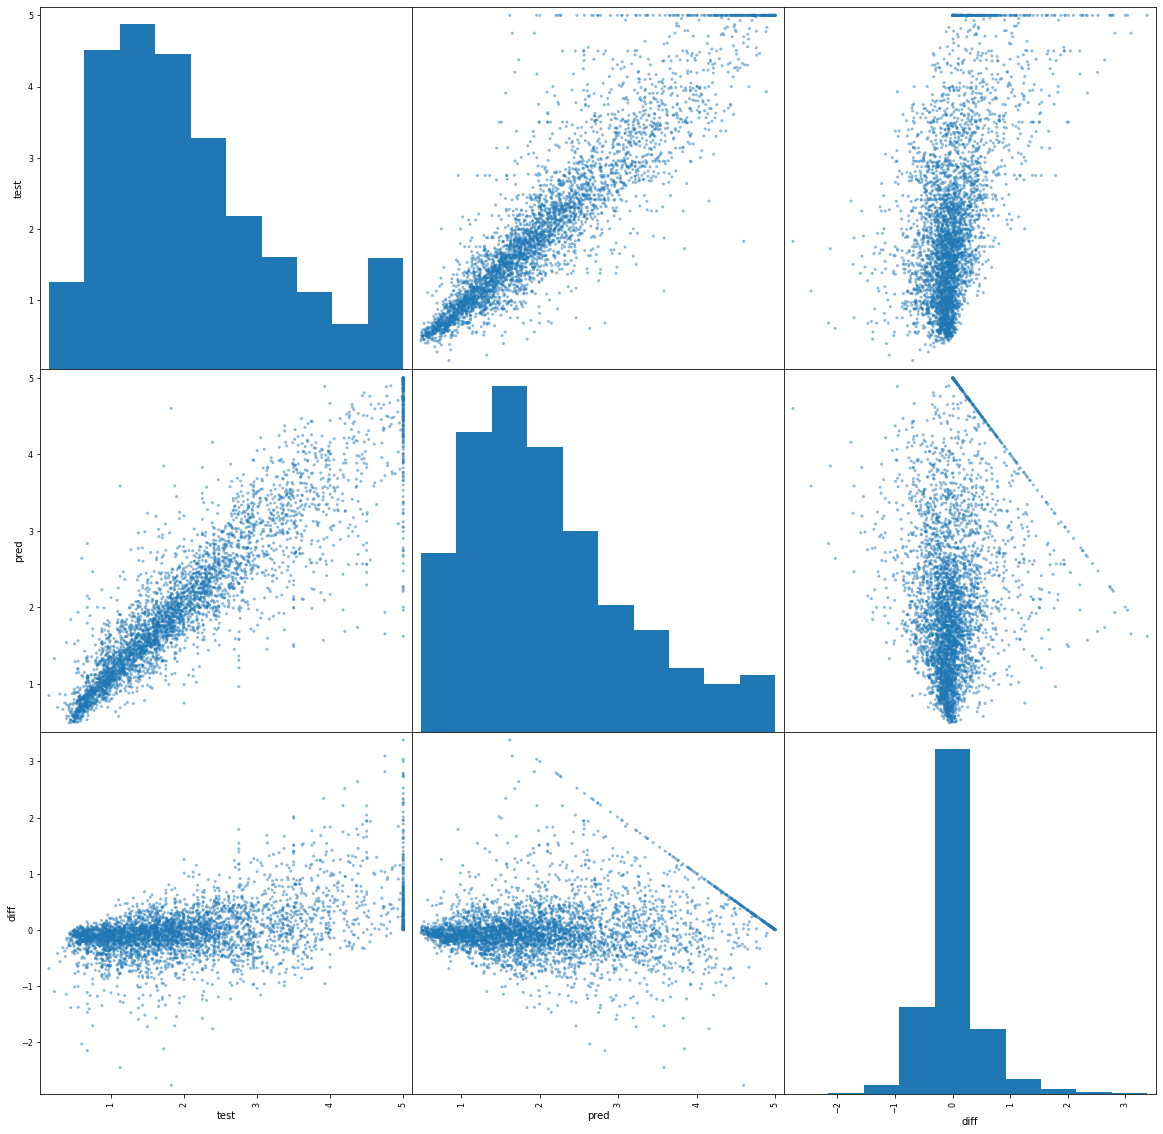

In [63]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

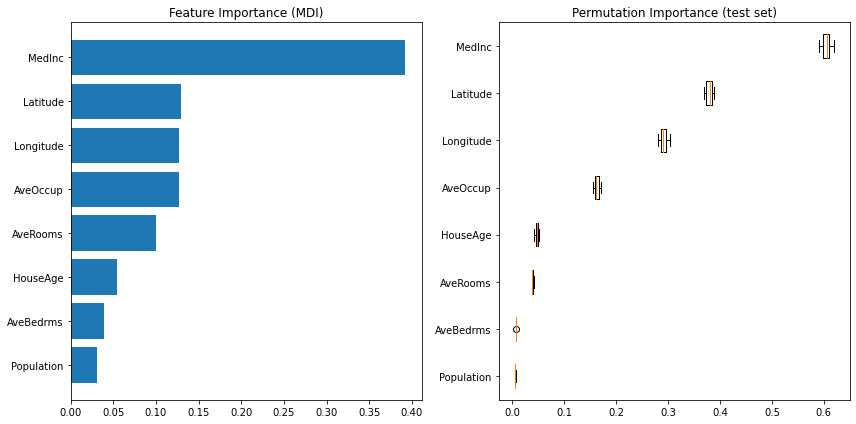

In [65]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Gradient Boosting

In [68]:
# Gradient Boosting
algo = GradientBoostingRegressor()
#create 5 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Define our candidate hyperparameters
max_features_range = np.arange(1,10,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2)
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ...max_features=1, n_estimators=10;, score=0.337 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=10;, score=0.314 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=10;, score=0.323 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=20;, score=0.425 total time=   0.1s
[CV 4/5] END ...max_features=1, n_estimators=20;, score=0.434 total time=   0.1s
[CV 1/5] END ...max_features=1, n_estimators=30;, score=0.543 total time=   0.1s
[CV 3/5] END ...max_features=1, n_estimators=30;, score=0.556 total time=   0.1s
[CV 5/5] END ...max_features=1, n_estimators=30;, score=0.602 total time=   0.1s
[CV 2/5] END ...max_features=1, n_estimators=40;, score=0.624 total time=   0.1s
[CV 4/5] END ...max_features=1, n_estimators=40;, score=0.615 total time=   0.1s
[CV 1/5] END ...max_features=1, n_estimators=50;, score=0.662 total time=   0.2s
[CV 3/5] END ...max_features=1, n_estimators=5

[CV 2/5] END ...max_features=1, n_estimators=10;, score=0.334 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=10;, score=0.303 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=20;, score=0.498 total time=   0.1s
[CV 3/5] END ...max_features=1, n_estimators=20;, score=0.465 total time=   0.1s
[CV 5/5] END ...max_features=1, n_estimators=20;, score=0.462 total time=   0.1s
[CV 2/5] END ...max_features=1, n_estimators=30;, score=0.592 total time=   0.1s
[CV 4/5] END ...max_features=1, n_estimators=30;, score=0.567 total time=   0.1s
[CV 1/5] END ...max_features=1, n_estimators=40;, score=0.625 total time=   0.1s
[CV 3/5] END ...max_features=1, n_estimators=40;, score=0.599 total time=   0.1s
[CV 5/5] END ...max_features=1, n_estimators=40;, score=0.612 total time=   0.1s
[CV 2/5] END ...max_features=1, n_estimators=50;, score=0.673 total time=   0.2s
[CV 4/5] END ...max_features=1, n_estimators=50;, score=0.620 total time=   0.2s
[CV 1/5] END ...max_features

[CV 3/5] END ..max_features=2, n_estimators=200;, score=0.788 total time=   1.2s
[CV 5/5] END ..max_features=2, n_estimators=200;, score=0.789 total time=   1.2s
[CV 3/5] END ...max_features=3, n_estimators=20;, score=0.617 total time=   0.2s
[CV 5/5] END ...max_features=3, n_estimators=20;, score=0.603 total time=   0.2s
[CV 2/5] END ...max_features=3, n_estimators=30;, score=0.688 total time=   0.3s
[CV 4/5] END ...max_features=3, n_estimators=30;, score=0.681 total time=   0.3s
[CV 1/5] END ...max_features=3, n_estimators=40;, score=0.716 total time=   0.4s
[CV 3/5] END ...max_features=3, n_estimators=40;, score=0.720 total time=   0.3s
[CV 5/5] END ...max_features=3, n_estimators=40;, score=0.712 total time=   0.4s
[CV 2/5] END ...max_features=3, n_estimators=50;, score=0.738 total time=   0.5s
[CV 4/5] END ...max_features=3, n_estimators=50;, score=0.723 total time=   0.4s
[CV 1/5] END ...max_features=3, n_estimators=60;, score=0.751 total time=   0.5s
[CV 3/5] END ...max_features

[CV 3/5] END ...max_features=5, n_estimators=40;, score=0.733 total time=   0.6s
[CV 5/5] END ...max_features=5, n_estimators=40;, score=0.727 total time=   0.6s
[CV 2/5] END ...max_features=5, n_estimators=50;, score=0.762 total time=   0.8s
[CV 4/5] END ...max_features=5, n_estimators=50;, score=0.732 total time=   0.8s
[CV 1/5] END ...max_features=5, n_estimators=60;, score=0.755 total time=   0.9s
[CV 3/5] END ...max_features=5, n_estimators=60;, score=0.764 total time=   0.9s
[CV 5/5] END ...max_features=5, n_estimators=60;, score=0.760 total time=   0.9s
[CV 2/5] END ...max_features=5, n_estimators=70;, score=0.777 total time=   1.1s
[CV 4/5] END ...max_features=5, n_estimators=70;, score=0.754 total time=   1.1s
[CV 1/5] END ...max_features=5, n_estimators=80;, score=0.772 total time=   1.3s
[CV 3/5] END ...max_features=5, n_estimators=80;, score=0.783 total time=   1.2s
[CV 5/5] END ...max_features=5, n_estimators=80;, score=0.777 total time=   1.3s
[CV 2/5] END ...max_features

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn

[CV 1/5] END ..max_features=8, n_estimators=190;, score=0.804 total time=   4.1s
[CV 3/5] END ..max_features=8, n_estimators=190;, score=0.804 total time=   4.6s
[CV 5/5] END ..max_features=8, n_estimators=190;, score=0.804 total time=   4.7s
[CV 2/5] END ..max_features=8, n_estimators=200;, score=0.816 total time=   4.5s
[CV 4/5] END ..max_features=8, n_estimators=200;, score=0.794 total time=   4.5s
[CV 1/5] END .....max_features=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END .....max_features=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END .....max_features=9, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END .....max_features=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END .....max_features=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END .....max_features=9, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END .....max_features=9, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END .....max_featur

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning:

One or more of the test scores are non-finite: [0.32236033 0.45689689 0.5719091  0.61503165 0.65675252 0.68859395
 0.69874006 0.71545771 0.71841755 0.72936871 0.7340227  0.74515291
 0.74566101 0.74823659 0.75195092 0.7557856  0.75823486 0.75998373
 0.76329255 0.76341498 0.3987087  0.55734223 0.65727361 0.69284172
 0.71882482 0.73208959 0.74452847 0.75515133 0.75959702 0.76174536
 0.769169   0.77383254 0.77742161 0.77916038 0.78136877 0.78070791
 0.78608305 0.78910074 0.78900601 0.78831161 0.44858278 0.60869886
 0.68129309 0.71545905 0.73361726 0.74923804 0.76096858 0.76517322
 0.77171623 0.77738374 0.78094644 0.78426035 0.78521695 0.79153713
 0.79329678 0.79522676 0.79669331 0.79911581 0.79843791 0.80210632
 0.4796591  0.61958504 0.68684099 0.72237016 0.74220059 0.75595277
 0.76526034 0.77501499 0.78037983 0.78177363 0.78703657 0.78823886
 0.79062638 0.79490219 0.79541751 0.

The best parameters are {'max_features': 6, 'n_estimators': 200} with a score of 0.81


In [69]:
#validation curve for single parameter
param_range = np.arange(10,1000,10)
train_scores, valid_scores = validation_curve(
    algo,
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="r2",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, valid_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    valid_scores_mean - valid_scores_std,
    valid_scores_mean + valid_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 

In [6]:
#grid.cv_results_

In [70]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [71]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
max_features_best = grid.cv_results_['param_max_features'][grid.best_index_]
model = GradientBoostingRegressor(max_features=max_features_best, n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [72]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

0.2557347010768269


In [73]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

0.5057021861499383


In [74]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.3443715403452455


In [75]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

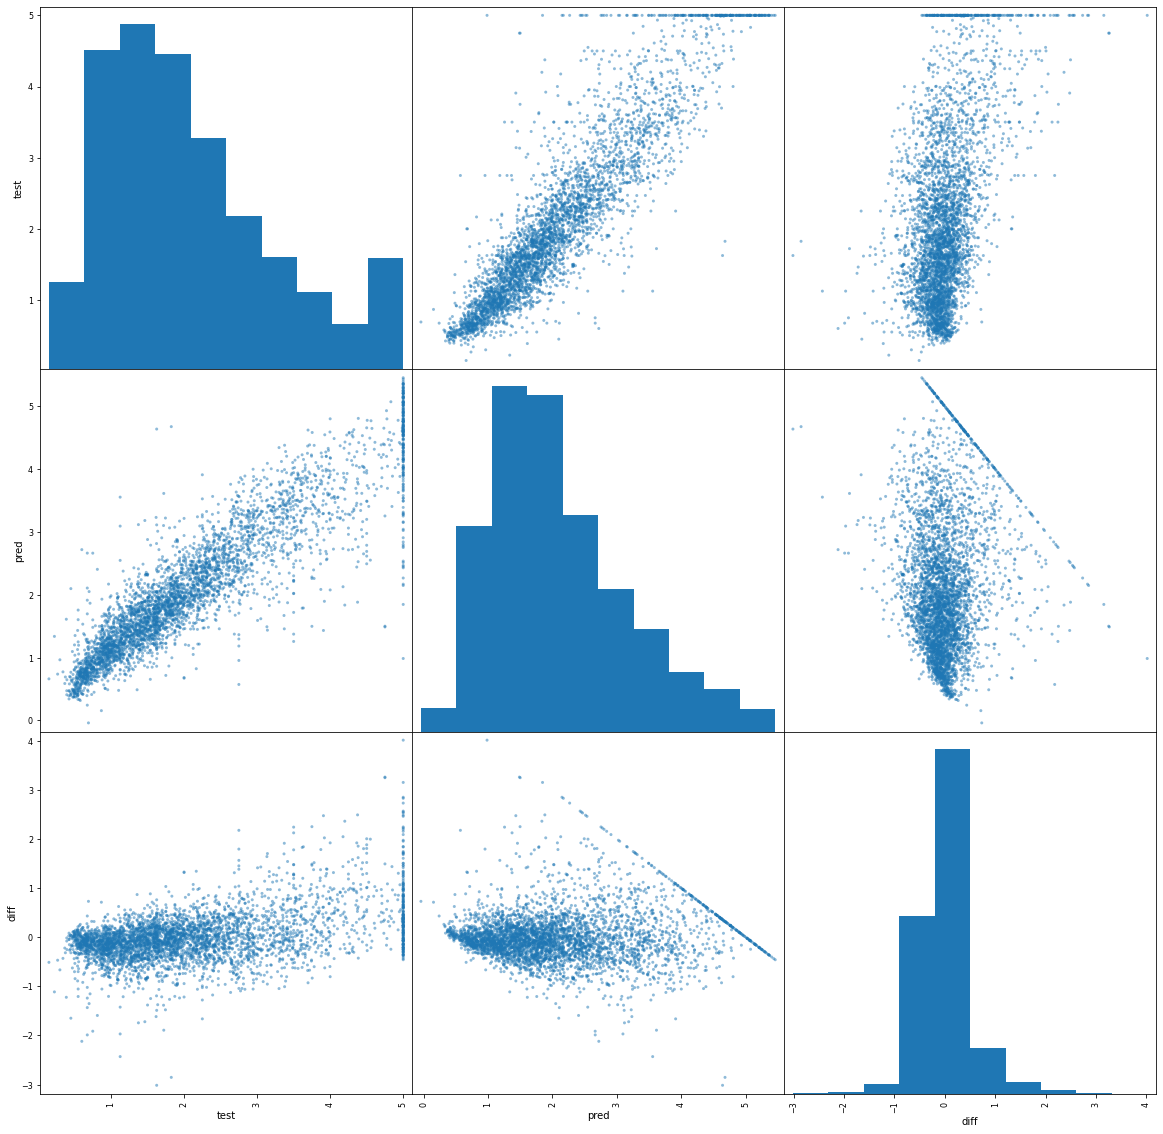

In [76]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

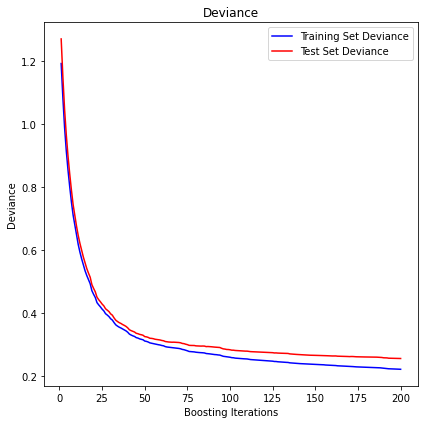

In [77]:
test_score = np.zeros((n_estimators_best,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(n_estimators_best) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(n_estimators_best) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

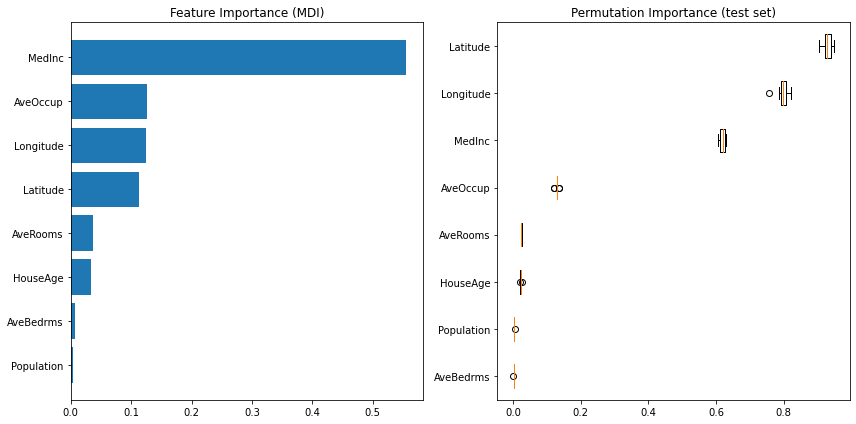

In [79]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Adaboost

In [80]:
# Adaboost
algo = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# create 5 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Define our candidate hyperparameters
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              #'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':np.arange(10,210,10)}

# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=2, n_jobs=2)
grid.fit(X_train, y_train)

# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .......base_estimator__max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......base_estimator__max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......base_estimator__max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......base_estimator__max_depth=2, n_estimators=20; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=20; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=20; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=30; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=30; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=40; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=40; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=50; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n

[CV] END .......base_estimator__max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......base_estimator__max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......base_estimator__max_depth=2, n_estimators=20; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=20; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=30; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=30; total time=   0.3s
[CV] END .......base_estimator__max_depth=2, n_estimators=30; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=40; total time=   0.5s
[CV] END .......base_estimator__max_depth=2, n_estimators=40; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=40; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=50; total time=   0.4s
[CV] END .......base_estimator__max_depth=2, n_estimators=50; total time=   0.2s
[CV] END .......base_estimat

[CV] END .......base_estimator__max_depth=6, n_estimators=30; total time=   0.8s
[CV] END .......base_estimator__max_depth=6, n_estimators=30; total time=   0.9s
[CV] END .......base_estimator__max_depth=6, n_estimators=40; total time=   1.1s
[CV] END .......base_estimator__max_depth=6, n_estimators=40; total time=   1.1s
[CV] END .......base_estimator__max_depth=6, n_estimators=50; total time=   1.3s
[CV] END .......base_estimator__max_depth=6, n_estimators=50; total time=   1.3s
[CV] END .......base_estimator__max_depth=6, n_estimators=50; total time=   1.3s
[CV] END .......base_estimator__max_depth=6, n_estimators=60; total time=   1.5s
[CV] END .......base_estimator__max_depth=6, n_estimators=60; total time=   1.8s
[CV] END .......base_estimator__max_depth=6, n_estimators=70; total time=   2.0s
[CV] END .......base_estimator__max_depth=6, n_estimators=70; total time=   1.7s
[CV] END .......base_estimator__max_depth=6, n_estimators=70; total time=   1.7s
[CV] END .......base_estimat

In [81]:
#grid.cv_results_

In [88]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['base_estimator__max_depth','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['base_estimator__max_depth', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot('base_estimator__max_depth', 'n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='base_estimator__max_depth') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [89]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
estimator_max_depth_best = grid.cv_results_['param_base_estimator__max_depth'][grid.best_index_]
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=estimator_max_depth_best), n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [90]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

0.24876259325696695


In [91]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

0.49876105828038236


In [92]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.3682610387083845


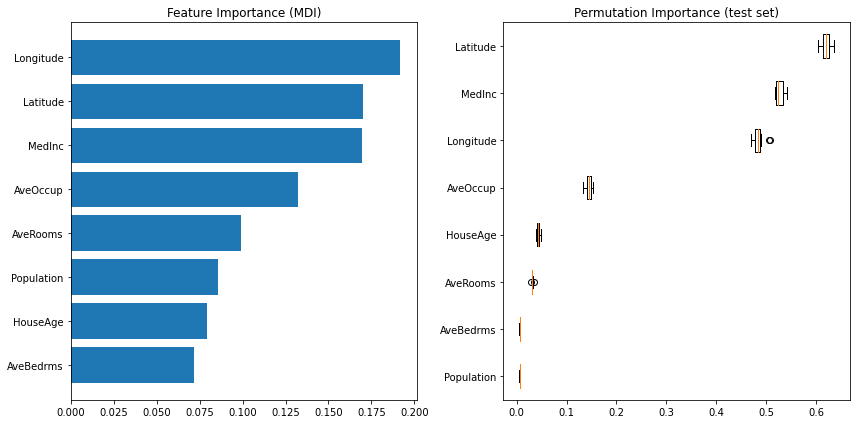

[CV] END ......base_estimator__max_depth=10, n_estimators=10; total time=   0.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=10; total time=   0.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=10; total time=   0.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=10; total time=   0.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=10; total time=   0.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=20; total time=   1.1s
[CV] END ......base_estimator__max_depth=10, n_estimators=20; total time=   1.1s
[CV] END ......base_estimator__max_depth=10, n_estimators=20; total time=   1.1s
[CV] END ......base_estimator__max_depth=10, n_estimators=30; total time=   1.6s
[CV] END ......base_estimator__max_depth=10, n_estimators=30; total time=   1.5s
[CV] END ......base_estimator__max_depth=10, n_estimators=40; total time=   1.9s
[CV] END ......base_estimator__max_depth=10, n_estimators=40; total time=   2.0s
[CV] END ......base_estimato

In [94]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Multi-layer Perceptron (MLP)

In [95]:
#Scaling the data
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [96]:
# MLP
algo = MLPRegressor(max_iter=500)

# create 5 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Define our candidate hyperparameters
param_grid = {#"hidden_layer_sizes": [(1,),(2,)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": 10.0 ** -np.arange(1, 7)
             }

# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2, return_train_score=True)
grid.fit(X_train, y_train)

# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=0.1, solver=lbfgs;, score=(train=0.609, test=0.599) total time=   0.3s
[CV 3/5] END activation=identity, alpha=0.1, solver=lbfgs;, score=(train=0.606, test=0.610) total time=   0.3s
[CV 5/5] END activation=identity, alpha=0.1, solver=lbfgs;, score=(train=0.607, test=0.605) total time=   0.2s
[CV 2/5] END activation=identity, alpha=0.1, solver=sgd;, score=(train=0.603, test=0.619) total time=   1.0s
[CV 3/5] END activation=identity, alpha=0.1, solver=sgd;, score=(train=0.603, test=0.609) total time=   0.7s
[CV 1/5] END activation=identity, alpha=0.1, solver=adam;, score=(train=0.585, test=0.581) total time=   0.5s
[CV 2/5] END activation=identity, alpha=0.1, solver=adam;, score=(train=0.602, test=0.619) total time=   0.5s
[CV 4/5] END activation=identity, alpha=0.1, solver=adam;, score=(train=0.606, test=0.593) total time=   0.6s
[CV 1/5] END activation=identity, alpha=0.01, solver=lbfgs;, score=(train=0.609, test=0.599) total time=   0.2s
[CV 2/5

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

[CV 2/5] END activation=identity, alpha=0.1, solver=lbfgs;, score=(train=0.604, test=0.619) total time=   0.3s
[CV 4/5] END activation=identity, alpha=0.1, solver=lbfgs;, score=(train=0.609, test=0.596) total time=   0.3s
[CV 1/5] END activation=identity, alpha=0.1, solver=sgd;, score=(train=0.607, test=0.596) total time=   1.2s
[CV 4/5] END activation=identity, alpha=0.1, solver=sgd;, score=(train=0.608, test=0.592) total time=   0.6s
[CV 5/5] END activation=identity, alpha=0.1, solver=sgd;, score=(train=0.607, test=0.606) total time=   0.7s
[CV 3/5] END activation=identity, alpha=0.1, solver=adam;, score=(train=0.602, test=0.606) total time=   0.5s
[CV 5/5] END activation=identity, alpha=0.1, solver=adam;, score=(train=0.605, test=0.602) total time=   0.9s
[CV 4/5] END activation=identity, alpha=0.01, solver=lbfgs;, score=(train=0.609, test=0.596) total time=   0.3s
[CV 2/5] END activation=identity, alpha=0.01, solver=sgd;, score=(train=0.575, test=0.592) total time=   0.6s
[CV 3/5] 

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_ne

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/h

[CV 4/5] END activation=logistic, alpha=0.0001, solver=lbfgs;, score=(train=0.794, test=0.763) total time=  25.6s
[CV 1/5] END activation=logistic, alpha=0.0001, solver=sgd;, score=(train=0.626, test=0.616) total time=  10.0s
[CV 3/5] END activation=logistic, alpha=0.0001, solver=sgd;, score=(train=0.627, test=0.631) total time=  13.4s
[CV 4/5] END activation=logistic, alpha=0.0001, solver=sgd;, score=(train=0.629, test=0.615) total time=  12.6s
[CV 1/5] END activation=logistic, alpha=0.0001, solver=adam;, score=(train=0.777, test=0.775) total time=  31.6s
[CV 3/5] END activation=logistic, alpha=0.0001, solver=adam;, score=(train=0.774, test=0.749) total time=  26.1s
[CV 5/5] END activation=logistic, alpha=0.0001, solver=adam;, score=(train=0.771, test=0.763) total time=  27.6s
[CV 3/5] END activation=logistic, alpha=1e-05, solver=lbfgs;, score=(train=0.791, test=0.765) total time=  26.4s
[CV 5/5] END activation=logistic, alpha=1e-05, solver=lbfgs;, score=(train=0.794, test=0.776) tota

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

[CV 1/5] END activation=logistic, alpha=1e-05, solver=sgd;, score=(train=0.635, test=0.625) total time=  18.1s
[CV 3/5] END activation=logistic, alpha=1e-05, solver=sgd;, score=(train=0.629, test=0.633) total time=  18.0s
[CV 1/5] END activation=logistic, alpha=1e-05, solver=adam;, score=(train=0.772, test=0.770) total time=  28.0s
[CV 3/5] END activation=logistic, alpha=1e-05, solver=adam;, score=(train=0.781, test=0.758) total time=  32.8s
[CV 5/5] END activation=logistic, alpha=1e-05, solver=adam;, score=(train=0.780, test=0.770) total time=  35.8s
[CV 2/5] END activation=logistic, alpha=1e-06, solver=lbfgs;, score=(train=0.789, test=0.787) total time=  25.2s
[CV 4/5] END activation=logistic, alpha=1e-06, solver=lbfgs;, score=(train=0.793, test=0.768) total time=  24.4s
[CV 1/5] END activation=logistic, alpha=1e-06, solver=sgd;, score=(train=0.629, test=0.620) total time=  13.0s
[CV 3/5] END activation=logistic, alpha=1e-06, solver=sgd;, score=(train=0.623, test=0.626) total time=  

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The best parameters are {'activation': 'relu', 'alpha': 1e-05, 'solver': 'lbfgs'} with a score of 0.79


/local/home/ar245054/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [97]:
#grid.cv_results_

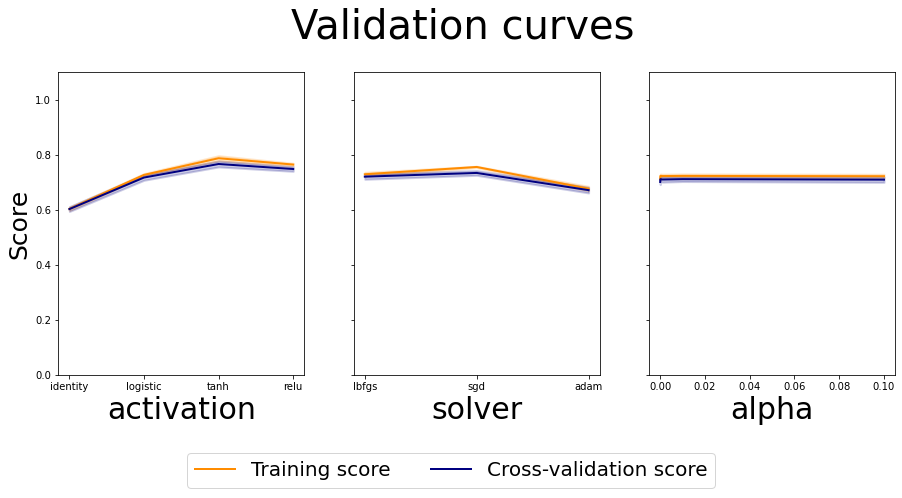

[CV 2/5] END activation=relu, alpha=0.01, solver=lbfgs;, score=(train=0.820, test=0.789) total time=  15.3s
[CV 4/5] END activation=relu, alpha=0.01, solver=lbfgs;, score=(train=0.825, test=0.761) total time=  16.2s
[CV 1/5] END activation=relu, alpha=0.01, solver=sgd;, score=(train=0.763, test=0.765) total time=  25.7s
[CV 3/5] END activation=relu, alpha=0.01, solver=sgd;, score=(train=0.764, test=0.742) total time=  23.5s
[CV 5/5] END activation=relu, alpha=0.01, solver=sgd;, score=(train=0.762, test=0.754) total time=  20.7s
[CV 4/5] END activation=relu, alpha=0.01, solver=adam;, score=(train=0.791, test=0.753) total time=   6.5s
[CV 1/5] END activation=relu, alpha=0.001, solver=lbfgs;, score=(train=0.816, test=0.790) total time=  16.0s
[CV 3/5] END activation=relu, alpha=0.001, solver=lbfgs;, score=(train=0.819, test=0.773) total time=  16.7s
[CV 5/5] END activation=relu, alpha=0.001, solver=lbfgs;, score=(train=0.820, test=0.776) total time=  16.3s
[CV 2/5] END activation=relu, al

In [98]:
df = pd.DataFrame(grid.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    #n = 1 # size of each group
    #return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))
    return np.sqrt(sum((stds**2))/ len(stds))

fig, axes = plt.subplots(1, len(param_grid), 
                         figsize = (5*len(param_grid), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(param_grid.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()